In [255]:
from keras.datasets import mnist
from keras import models, layers

In [283]:

nn = models.Sequential()
nn.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28, )))
nn.add(layers.Dense(512, activation='elu', input_shape=(28 * 28, )))
nn.add(layers.Dense(256, activation='selu', input_shape=(28 * 28, )))
nn.add(layers.Dense(10, activation='softmax'))

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60_000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10_000, 28 * 28))
test_images = test_images.astype('float32') / 255

# custom metrics
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', precision, recall])

In [284]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense
from keras.models import Sequential, Input, Model
from sklearn import datasets

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

nn.fit(train_images, train_labels, epochs=12, batch_size=128)


Epoch 1/12
469/469 [==============================] - 6s 12ms/step - loss: 0.4549 - accuracy: 0.8743 - precision: 0.8975 - recall: 0.8472
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0959 - accuracy: 0.9712 - precision: 0.9741 - recall: 0.9693
Epoch 3/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0649 - accuracy: 0.9806 - precision: 0.9825 - recall: 0.9798
Epoch 4/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0453 - accuracy: 0.9857 - precision: 0.9867 - recall: 0.9848
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0346 - accuracy: 0.9895 - precision: 0.9899 - recall: 0.9891
Epoch 6/12
469/469 [==============================] - 5s 10ms/step - loss: 0.0259 - accuracy: 0.9922 - precision: 0.9926 - recall: 0.9919
Epoch 7/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0220 - accuracy: 0.9939 - precision: 0.9941 - recall: 0.9937
Epoch 8/12
469/469 [==============

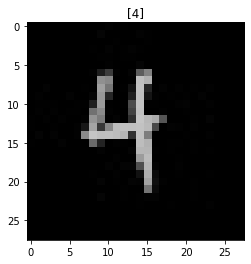

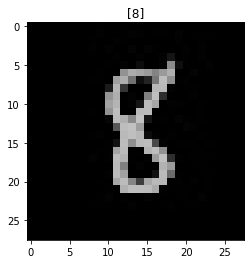

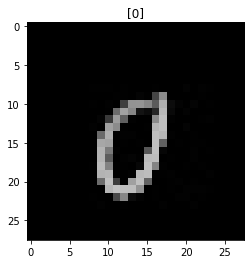

[None, None, None]

In [291]:
files = ["images/4.jpg", "images/8.jpg", "images/0.jpg"]

def plot_image_result(file):
    image = cv.imread(file, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (28, 28))
    image = image.astype('float32')
    image = image.reshape(1, 28, 28, 1)
    image = 255-image
    image /= 255

    pred = nn.predict(image.reshape(1, 784), batch_size=1)

    plt.imshow(cv2.cvtColor(image.reshape(28,28), cv2.COLOR_BGR2RGB))
    plt.title(np.argmax(pred, axis=1))
    plt.show()
    
[plot_image_result(file) for file in files]

In [293]:
nn.save("models/mnist.model")

INFO:tensorflow:Assets written to: models/mnist.model/assets


In [285]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [211]:
def image(self, captcha_str):
        """
        Generate a greyscale captcha image representing number string

        Parameters
        ----------
        captcha_str: str
            string a characters for captcha image

        Returns
        -------
        numpy.ndarray
            Generated greyscale image in np.ndarray float type with values normalized to [0, 1]
        """
        img = self.captcha.generate(captcha_str)
        img = np.fromstring(img.getvalue(), dtype='uint8')
        img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (self.h, self.w))
        img = img.transpose(1, 0)
        img = np.multiply(img, 1 / 255.0)
        return img 
    

TypeError: scatter() missing 1 required positional argument: 'y'

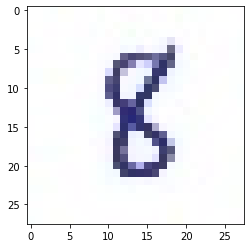

In [80]:
# y=cv.imread(file)   #image outside mnist data
# y1=cv.resize(y,(28,28))                #you need to resize it on the bsis pf your  modeL's image shape
# plt.imshow(y1)

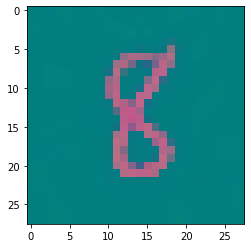

In [81]:
temp = cv.cvtColor(y1,cv.COLOR_BGR2YCrCb)  #since its a three channel image i hav econverted into this so rbg are represented in the luminance one 
temp=255-temp                                #negative image
plt.imshow(temp)

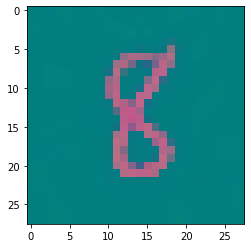

In [85]:
Y = np.zeros((temp.shape[0], temp.shape[1],1), dtype=float)    #array of (28,28,1)
Y[:,:,0] = temp[:, :,0].astype(float) / 255           #fitting the data of temp image in that zeros and normalizing it
yh= nn.predict_classes(Y.reshape(1,28,28,1))       #finally the value of image
yh

ValueError: in user code:

    /usr/local/lib/python3.9/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.9/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /usr/local/lib/python3.9/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /usr/local/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.9/site-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28, 28, 1)


In [86]:
temp.shape

(28, 28, 3)

In [87]:
image.shape

(1, 28, 28, 1)